In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import io
import requests
from datetime import datetime

In [2]:
df=pd.read_csv("diminos_data.csv")

In [3]:
df.head()

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            15000 non-null  int64 
 1   order_placed_at     15000 non-null  object
 2   order_delivered_at  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB


In [5]:
# Convert the "order_delivered_at" column to a pandas datetime object
df["order_delivered_at"] = pd.to_datetime(df["order_delivered_at"])
df["order_placed_at"] = pd.to_datetime(df["order_placed_at"])
# Calculate the delivery time as a timedelta object
df["delivery_time"] = df["order_delivered_at"] - df["order_placed_at"]

# Print the first few rows of the modified DataFrame to check the results
print(df.head())


   order_id     order_placed_at         order_delivered_at  \
0   1523111 2023-03-01 00:00:59 2023-03-01 00:18:07.443132   
1   1523112 2023-03-01 00:03:59 2023-03-01 00:19:34.925241   
2   1523113 2023-03-01 00:07:22 2023-03-01 00:22:28.291385   
3   1523114 2023-03-01 00:07:47 2023-03-01 00:46:19.019399   
4   1523115 2023-03-01 00:09:03 2023-03-01 00:25:13.619056   

           delivery_time  
0 0 days 00:17:08.443132  
1 0 days 00:15:35.925241  
2 0 days 00:15:06.291385  
3 0 days 00:38:32.019399  
4 0 days 00:16:10.619056  


In [6]:
durations=df['delivery_time']
# Convert the Series object to a Timedelta object
timedeltas = pd.to_timedelta(durations)

# Calculate the total number of seconds in each Timedelta object
seconds = timedeltas.dt.total_seconds()

# Print the resulting Series object of seconds
print(seconds)

0        1028.443132
1         935.925241
2         906.291385
3        2312.019399
4         970.619056
            ...     
14995     932.409378
14996    1004.672912
14997     924.676238
14998     957.810358
14999     922.499311
Name: delivery_time, Length: 15000, dtype: float64


In [7]:
# Extract the total seconds from the timedelta object to calculate the difference in minutes
min_diff = seconds / 60

# Print the result
print(f"The time difference is {min_diff} hours")



The time difference is 0        17.140719
1        15.598754
2        15.104856
3        38.533657
4        16.176984
           ...    
14995    15.540156
14996    16.744549
14997    15.411271
14998    15.963506
14999    15.374989
Name: delivery_time, Length: 15000, dtype: float64 hours


In [8]:
df.head(5)

,order_id,order_placed_at,order_delivered_at,delivery_time
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,0 days 00:17:08.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,0 days 00:15:35.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,0 days 00:15:06.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,0 days 00:38:32.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,0 days 00:16:10.619056


In [9]:
df.tail(5)

,order_id,order_placed_at,order_delivered_at,delivery_time
14995,1538106,2023-03-27 23:37:05,2023-03-27 23:52:37.409378,0 days 00:15:32.409378
14996,1538107,2023-03-27 23:47:38,2023-03-28 00:04:22.672912,0 days 00:16:44.672912
14997,1538108,2023-03-27 23:50:16,2023-03-28 00:05:40.676238,0 days 00:15:24.676238
14998,1538109,2023-03-27 23:52:44,2023-03-28 00:08:41.810358,0 days 00:15:57.810358
14999,1538110,2023-03-27 23:58:20,2023-03-28 00:13:42.499311,0 days 00:15:22.499311


In [10]:
df['delivery_time_min']=min_diff

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   order_id            15000 non-null  int64          
 1   order_placed_at     15000 non-null  datetime64[ns] 
 2   order_delivered_at  15000 non-null  datetime64[ns] 
 3   delivery_time       15000 non-null  timedelta64[ns]
 4   delivery_time_min   15000 non-null  float64        
dtypes: datetime64[ns](2), float64(1), int64(1), timedelta64[ns](1)
memory usage: 586.1 KB


In [12]:
# Calculate the proportion of orders delivered within 31 minutes
prop_on_time = (df["delivery_time_min"] <= 31).mean()
print(f"Proportion of orders delivered on time: {prop_on_time:.2f}")

Proportion of orders delivered on time: 0.96


In [13]:
# Calculate the 95th percentile delivery time
pct_95 = np.percentile(df["delivery_time_min"], 95)
print(f"The 95th percentile delivery time is {pct_95:.2f} minutes.")


The 95th percentile delivery time is 27.26 minutes.


In [14]:
df.duplicated().sum()

0

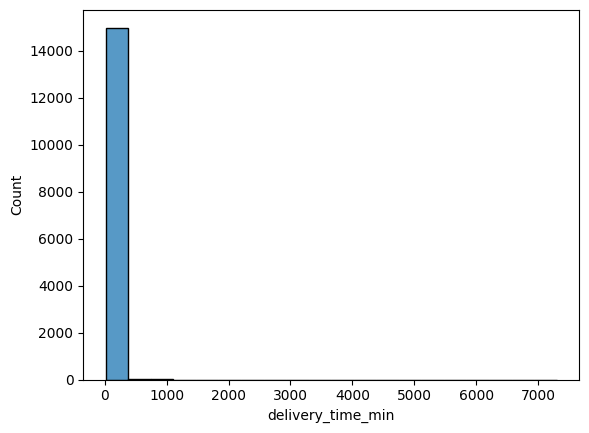

In [15]:
# Create a histogram of delivery time in minutes
sns.histplot(data=df, x="delivery_time_min", bins=20)
plt.show()

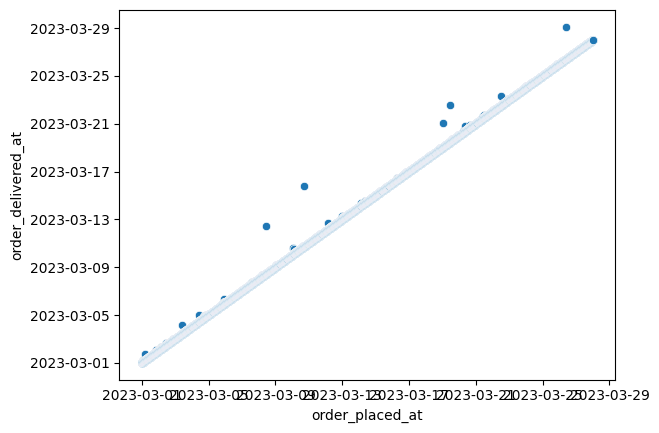

In [16]:
# Create a scatter plot of ordered time and delivery time
sns.scatterplot(x="order_placed_at", y="order_delivered_at", data=df)
plt.show()

In [17]:
df.columns

Index(['order_id', 'order_placed_at', 'order_delivered_at', 'delivery_time',
       'delivery_time_min'],
      dtype='object')

In [18]:
# Calculate the average delivery time
avg_delivery_time = df['delivery_time'].mean()

print('Average delivery time:', avg_delivery_time)

Average delivery time: 0 days 00:20:29.963359588


In [19]:
# Calculate the distribution of delivery times
delivery_time_counts = df['delivery_time'].value_counts()
print('Distribution of delivery times:')
print(delivery_time_counts)


Distribution of delivery times:
0 days 00:15:08.404902    2
0 days 00:15:19.540442    2
0 days 00:15:02.045940    2
0 days 00:17:08.443132    1
0 days 00:15:55.339759    1
                         ..
0 days 00:17:19.989206    1
0 days 00:22:05.852398    1
0 days 00:15:11.178449    1
0 days 00:17:17.382379    1
0 days 00:15:22.499311    1
Name: delivery_time, Length: 14997, dtype: int64


In [20]:
# Convert timestamp column to datetime object
df['Timestamp'] = pd.to_datetime(df['order_delivered_at'])

# Create new columns for Day_of_Week and hour of day
df['Day_of_Week'] = df['Timestamp'].dt.day_name()
df['Hour of Day'] = df['Timestamp'].dt.hour

In [21]:
df.columns

Index(['order_id', 'order_placed_at', 'order_delivered_at', 'delivery_time',
       'delivery_time_min', 'Timestamp', 'Day_of_Week', 'Hour of Day'],
      dtype='object')

In [22]:
# Group data by Day_of_Week and calculate average delivery time
avg_delivery_by_day = df.groupby('Day_of_Week')['delivery_time'].mean()

# Group data by hour of day and calculate average delivery time
avg_delivery_by_hour = df.groupby('Hour of Day')['delivery_time'].mean()



In [23]:
print('Average delivery time by Day_of_Week:\n', avg_delivery_by_day)


Average delivery time by Day_of_Week:
 Day_of_Week
Friday      0 days 00:18:21.693175465
Monday      0 days 00:19:39.828267090
Saturday    0 days 00:19:04.700017610
Sunday      0 days 00:20:56.470640143
Thursday    0 days 00:19:07.148800034
Tuesday     0 days 00:21:03.939860433
Wednesday   0 days 00:25:23.424147946
Name: delivery_time, dtype: timedelta64[ns]


In [24]:
print('Average delivery time by hour of day:\n', avg_delivery_by_hour)

Average delivery time by hour of day:
 Hour of Day
0    0 days 00:22:39.624245873
1    0 days 00:19:12.163455964
2    0 days 00:24:40.970663674
3    0 days 00:21:22.323832919
4    0 days 00:18:09.097457098
5    0 days 00:18:45.555406673
6    0 days 00:17:53.074213582
7    0 days 00:19:09.584447988
8    0 days 00:20:59.029055442
9    0 days 00:17:11.052741163
10   0 days 00:18:16.200512096
11   0 days 00:28:48.054191877
12   0 days 00:18:15.317354080
13   0 days 00:25:37.617446811
14   0 days 00:19:21.973045491
15   0 days 00:18:44.616275742
16   0 days 00:18:58.502481193
17   0 days 00:19:12.248011379
18   0 days 00:32:28.514971542
19   0 days 00:17:35.503885898
20   0 days 00:18:07.023035876
21   0 days 00:18:23.607532897
22   0 days 00:18:58.420801695
23   0 days 00:19:30.880606561
Name: delivery_time, dtype: timedelta64[ns]


In [25]:

# Split data into training and testing sets# One-hot encode Day_of_Week
one_hot = OneHotEncoder()
encoded = one_hot.fit_transform(df[['Day_of_Week']])



In [26]:
# Convert encoded features into DataFrame and join with original DataFrame
encoded_df = pd.DataFrame(encoded.toarray(), columns=one_hot.get_feature_names_out(['Day_of_Week']))
df = pd.concat([df, encoded_df], axis=1)



In [27]:
# Drop original Day_of_Week column and any other unnecessary columns
df = df.drop(columns=[ 'Timestamp', 'delivery_time'])



In [29]:
df.columns

Index(['order_id', 'order_placed_at', 'order_delivered_at',
       'delivery_time_min', 'Day_of_Week', 'Hour of Day', 'Day_of_Week_Friday',
       'Day_of_Week_Monday', 'Day_of_Week_Saturday', 'Day_of_Week_Sunday',
       'Day_of_Week_Thursday', 'Day_of_Week_Tuesday', 'Day_of_Week_Wednesday'],
      dtype='object')

In [30]:
df.head()

,order_id,order_placed_at,order_delivered_at,delivery_time_min,Day_of_Week,Hour of Day,Day_of_Week_Friday,Day_of_Week_Monday,Day_of_Week_Saturday,Day_of_Week_Sunday,Day_of_Week_Thursday,Day_of_Week_Tuesday,Day_of_Week_Wednesday
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,17.140719,Wednesday,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,15.598754,Wednesday,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,15.104856,Wednesday,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,38.533657,Wednesday,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,16.176984,Wednesday,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [28]:
X = df[['Day of Week', 'Hour of Day']]
y = df['delivery_time']
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Build and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set and calculate RMSE
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred) ** 0.5

print('Root Mean Squared Error:', rmse)

KeyError: "['Day of Week'] not in index"